# Crop DATA

In [1]:
import seaborn as sns # to plot the data
import matplotlib.pyplot as plt # also to plot
from tensorflow import keras # The model
from tensorflow.keras import layers #using layers in the model
import pandas as pd # Open,read or write in the dataframe
from sklearn.model_selection import train_test_split # to create training and validation sets
from sklearn.metrics import mean_absolute_error # to find The mae
from sklearn.preprocessing import StandardScaler # to scale the numerical values
from sklearn.preprocessing import OneHotEncoder # to one hot encode thelabel and rice columns
from sklearn.pipeline import Pipeline # using the mode land preprocessor at once
from sklearn.compose import ColumnTransformer # to transform the colunmns in the preporcessor
import numpy as np # might need to make an array

df = pd.read_csv('Crop_Data.xlsx.csv') # loading the data

df.head() 

/Users/samuelandersen/Desktop/***REDACTED**/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,temperature,humidity,ph,rainfall,label,Label_Num
0,20.879744,82.002744,6.502985,202.935536,rice,0
1,21.770462,80.319644,7.038096,226.655537,rice,0
2,23.004459,82.320763,7.840207,263.964248,rice,0
3,26.491096,80.158363,6.980401,242.864034,rice,0
4,20.130175,81.604873,7.628473,262.717340,rice,0


# We want to predict the ph value Based on these things

* Temperature 

* Humidty

* Rainfall 

* Label

In [2]:
# The plan is to first make the labels column one hot encoded then add standard scalle all the columns after the one is one hot encoded

In [3]:
#finding object columns and one hot encoding them

col = (df.dtypes == 'object') # finding out which columns had objects in them
object_cols = list(col[col].index) # choosing the columns with objects 


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse output important so it dosent get set as sparse encoded vector
encoded_df = pd.DataFrame(encoder.fit_transform(df[object_cols])) # transforming the object colmuns

# adding index back 
index_df = df.drop(object_cols, axis=1) #removing the columns eith objects

New_df = pd.concat([index_df, encoded_df], axis=1) # adding them together

New_df.columns = New_df.columns.astype(str) # checking theyere all string

New_df.head() # looking at it if ti worked


,temperature,humidity,ph,rainfall,Label_Num,0,1,2,3,4,...,12,13,14,15,16,17,18,19,20,21
0,20.879744,82.002744,6.502985,202.935536,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.770462,80.319644,7.038096,226.655537,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.004459,82.320763,7.840207,263.964248,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,26.491096,80.158363,6.980401,242.864034,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20.130175,81.604873,7.628473,262.717340,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Now its time to set our prediction target and features

y = New_df['ph']

# alternate solution is to drop all te columns without the ones we need
X = pd.concat([
    New_df.loc[:, ['temperature','humidity', 'rainfall']],     
    New_df.iloc[:, 5:]  # One-hot encoded columns 
], axis=1)


# alternate solution is to drop all te columns without the ones we need
X.head()


,temperature,humidity,rainfall,0,1,2,3,4,5,6,...,12,13,14,15,16,17,18,19,20,21
0,20.879744,82.002744,202.935536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.770462,80.319644,226.655537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.004459,82.320763,263.964248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,26.491096,80.158363,242.864034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20.130175,81.604873,262.717340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
#we also need to scale X
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [14]:
#we also need to create the test and validation 

trainX, valX, trainy, valy = train_test_split(scaled_X,y, test_size=0.2, train_size=0.8,random_state=0) # making training test set

In [22]:
# we will build the model first # we can see the X has 25 columns so that means 25 inputs
input_shape = [scaled_X.shape[1]]
model = keras.Sequential([layers.BatchNormalization(input_shape=input_shape), # input
                          layers.Dense(units=512, activation='relu'),#hidden
                          layers.Dropout(0.3),#hidden
                          layers.BatchNormalization(),#hidden
                          layers.Dense(units=512, activation='relu'),#hidden
                          layers.Dropout(0.3),#hidden
                          layers.BatchNormalization(),#hidden
                          layers.Dense(units=512, activation='relu'),#hidden
                          layers.Dropout(0.3),#hiddden
                          layers.BatchNormalization(), #hidden
                          layers.Dense(units=1,), # output
                          ]
                         )

model.compile(optimizer='sgd', loss='mse', metrics=['mae']) #trying new loss and optimizer functions
# if we would want to control the learning rate i could use this   optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),

earlystopping = keras.callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)


/Users/samuelandersen/Desktop/***REDACTED**/.venv/lib/python3.9/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
plotting = model.fit(trainX,trainy, callbacks=earlystopping, validation_data=(valX,valy), batch_size=200, epochs=200 ) # turning it into a value so we can plot it



Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8079 - mae: 0.6835 - val_loss: 0.4910 - val_mae: 0.4725
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8789 - mae: 0.7114 - val_loss: 0.5066 - val_mae: 0.4846
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8553 - mae: 0.7092 - val_loss: 0.4974 - val_mae: 0.4783
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7534 - mae: 0.6710 - val_loss: 0.5092 - val_mae: 0.4836
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7722 - mae: 0.6816 - val_loss: 0.5072 - val_mae: 0.4778
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8244 - mae: 0.7069 - val_loss: 0.5004 - val_mae: 0.4793
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8248 - mae: 0.6907 - val_loss: 0.4891 - val_mae: 0.4725
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7408 - mae: 0.6622 - val_loss: 0.4908 - val_mae: 0.4724
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7782 - mae: 

<Axes: >

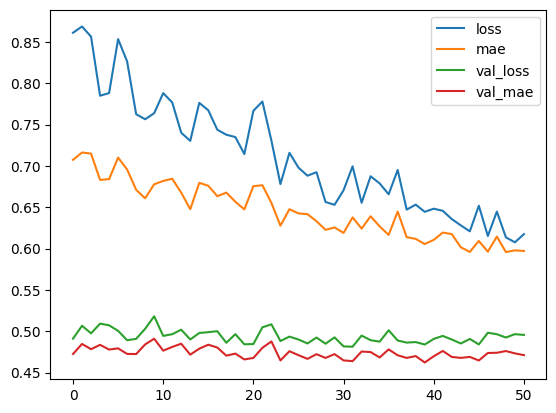

In [ ]:
plot_the_learning = pd.DataFrame(plotting.history) 
plot_the_learning.plot() # plotting the soution

In [ ]:
predicted = model.predict(valX)
mean_absolute_error(predicted, valy) # checking to see what the mean is 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


0.4647164774722323